#### Installing Libraries

In [132]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scipy

#### Importing Libraries

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Reading Data

Dataset: https://www.kaggle.com/datasets/lovishbansal123/sales-of-a-supermarket

In [134]:
df = pd.read_csv(r'C:\Users\RizkyBagaskara\Documents\Code Development\Data Analyst\Gundar IO\Week 4 EDA\supermarket_sales - Sheet1.csv', sep = ';')

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,261.415,5.489.715,01/05/2019,13:08,Ewallet,522.83,4.761.904.762,261.415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.820,80.22,03/08/2019,10:29,Cash,76.40,4.761.904.762,3.820,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,162.155,3.405.255,03/03/2019,13:23,Credit card,324.31,4.761.904.762,162.155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489.048,1/27/2019,20:33,Ewallet,465.76,4.761.904.762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,302.085,6.343.785,02/08/2019,10:37,Ewallet,604.17,4.761.904.762,302.085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,20.175,423.675,1/29/2019,13:46,Ewallet,40.35,4.761.904.762,20.175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.49,03/02/2019,17:16,Ewallet,973.80,4.761.904.762,48.690,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592,33.432,02/09/2019,13:22,Cash,31.84,4.761.904.762,1.592,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291,69.111,2/22/2019,15:33,Cash,65.82,4.761.904.762,3.291,4.1


Split date column for better analysis

In [135]:
df[['MM', 'DD', 'YY']] = df['Date'].str.split('/', expand=True)

In [161]:
df['MM'].unique()

array(['01', '03', '1', '02', '3', '2'], dtype=object)

In [136]:
df.shape #rows, col

(1000, 20)

Convert Total Column into Float

In [137]:
df['Total'] = df['Total'].apply(lambda x: float(x.replace('.', '')))

In [138]:
df['Total'] = df['Total'].astype(float)

In [255]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.floor('H')

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_2076\1360947176.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.floor('H')


In [256]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage            object
gross income                      float64
Rating                            float64
MM                                 object
DD                                 object
YY                                 object
dtype: object

In [257]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,MM,DD,YY
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,261.415,5489715.0,01/05/2019,1900-01-01 13:00:00,Ewallet,522.83,4.761.904.762,261.415,9.1,01,05,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.820,8022.0,03/08/2019,1900-01-01 10:00:00,Cash,76.40,4.761.904.762,3.820,9.6,03,08,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,162.155,3405255.0,03/03/2019,1900-01-01 13:00:00,Credit card,324.31,4.761.904.762,162.155,7.4,03,03,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.288,489048.0,1/27/2019,1900-01-01 20:00:00,Ewallet,465.76,4.761.904.762,23.288,8.4,1,27,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,302.085,6343785.0,02/08/2019,1900-01-01 10:00:00,Ewallet,604.17,4.761.904.762,302.085,5.3,02,08,2019


In [141]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,MM,DD,YY
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,20.175,423675.0,1/29/2019,13:46,Ewallet,40.35,4.761.904.762,20.175,6.2,1,29,2019
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,102249.0,03/02/2019,17:16,Ewallet,973.80,4.761.904.762,48.690,4.4,03,02,2019
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592,33432.0,02/09/2019,13:22,Cash,31.84,4.761.904.762,1.592,7.7,02,09,2019
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291,69111.0,2/22/2019,15:33,Cash,65.82,4.761.904.762,3.291,4.1,2,22,2019
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.919,649299.0,2/18/2019,13:28,Cash,618.38,4.761.904.762,30.919,6.6,2,18,2019


##### Data Attributes

- Invoice id: Computer generated sales slip invoice identification number.

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters.

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer.

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

- Unit price: Price of each product in $.

- Quantity: Number of products purchased by customer.

- Tax: 5% tax fee for customer buying.

- Total: Total price including tax.

- Date: Date of purchase (Record available from January 2019 to March 2019).

- Time: Purchase time (10am to 9pm).

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).

- COGS: Cost of goods sold.

- Gross margin percentage: Gross margin percentage.

- Gross income: Gross income.

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

#### Checking Data 

##### Check Null Values

In [142]:
df.isna().sum() / len(df) * 100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
MM                         0.0
DD                         0.0
YY                         0.0
dtype: float64

##### Check Duplicated Values

In [143]:
df.duplicated().sum() / len(df) * 100

np.float64(0.0)

#### Statistical View

In [144]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,44.633230,8.770664e+05,307.58738,44.633230,6.97270
std,26.494628,2.923431,75.564331,1.608492e+06,234.17651,75.564331,1.71858
min,10.080000,1.000000,0.508500,6.090000e+02,10.17000,0.508500,4.00000
25%,32.875000,3.000000,7.881750,8.668800e+04,118.49750,7.881750,5.50000
50%,55.230000,5.000000,17.334000,2.785860e+05,241.76000,17.334000,7.00000
75%,77.935000,8.000000,36.549750,6.968482e+05,448.90500,36.549750,8.50000
max,99.960000,10.000000,448.785000,9.424485e+06,993.00000,448.785000,10.00000


#### Checking for Outliers

In [145]:
#labels
unit_price = df['Unit price']
qty = df['Quantity']
cogs = df['cogs']
total_price = df['Total']
gross_income = df['gross income']
tax = df['Tax 5%']
ratings = df['Rating']

Text(0.5, 1.0, 'Ratings')

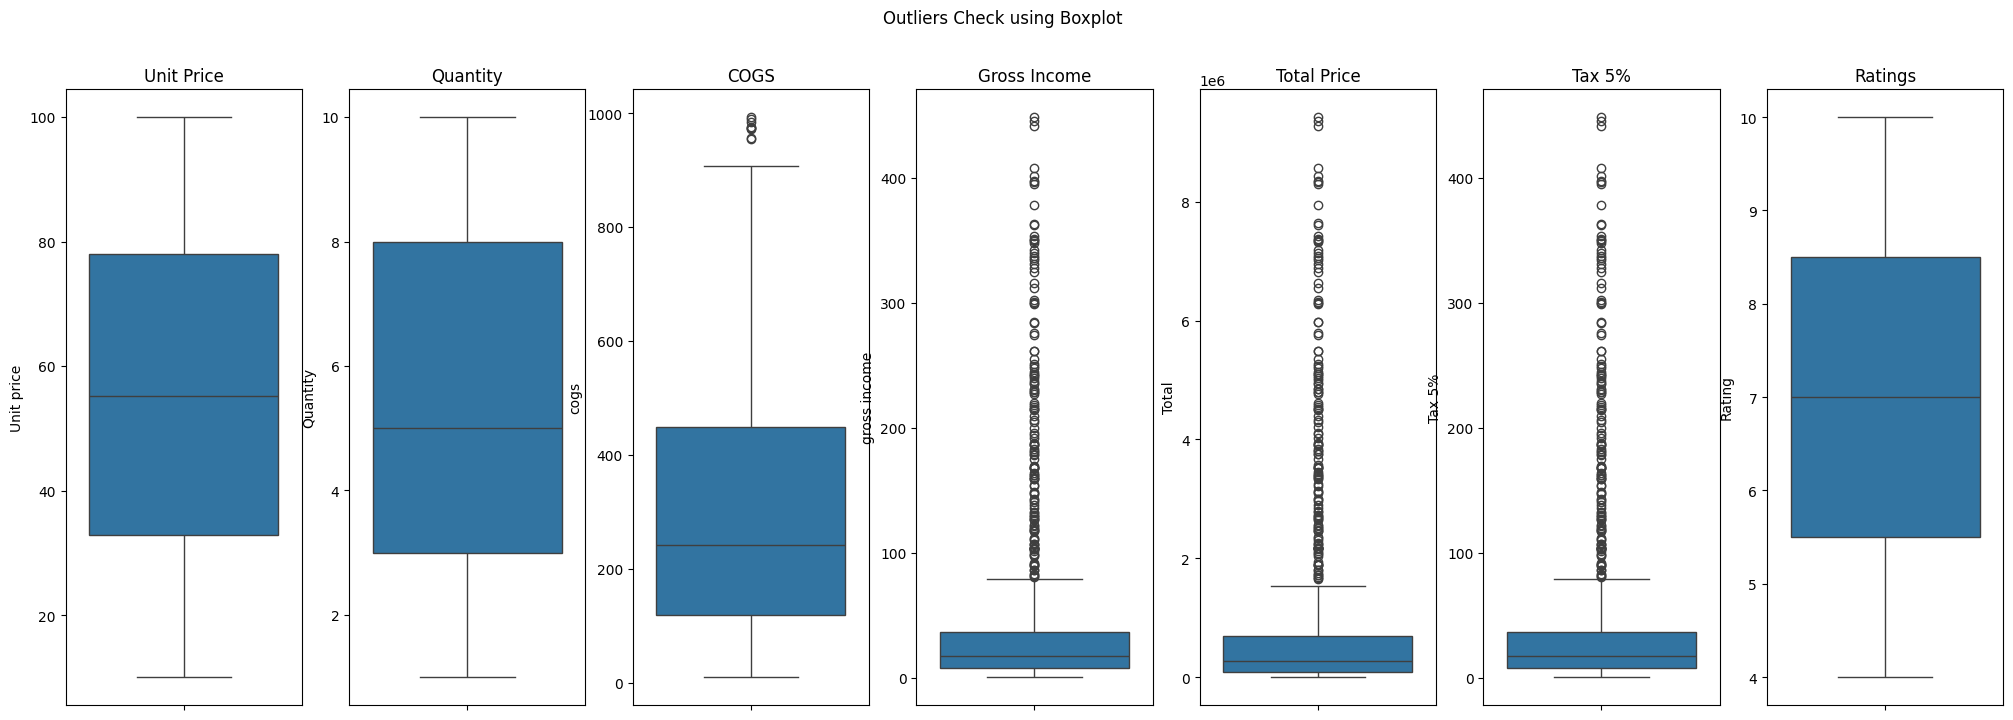

In [146]:
#subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 7, figsize = (25,8))
fig.suptitle('Outliers Check using Boxplot')

# unit_price
sns.boxplot(unit_price, ax=axes[0])
axes[0].set_title('Unit Price')

# qty
sns.boxplot(qty, ax=axes[1])
axes[1].set_title('Quantity')

# cogs
sns.boxplot(cogs, ax=axes[2])
axes[2].set_title('COGS')

# gross_income
sns.boxplot(gross_income, ax=axes[3])
axes[3].set_title('Gross Income')

# total price
sns.boxplot(total_price, ax=axes[4])
axes[4].set_title('Total Price')

# tax
sns.boxplot(tax, ax=axes[5])
axes[5].set_title('Tax 5%')

# ratings
sns.boxplot(ratings, ax=axes[6])
axes[6].set_title('Ratings')

Text(0.5, 1.0, 'Ratings')

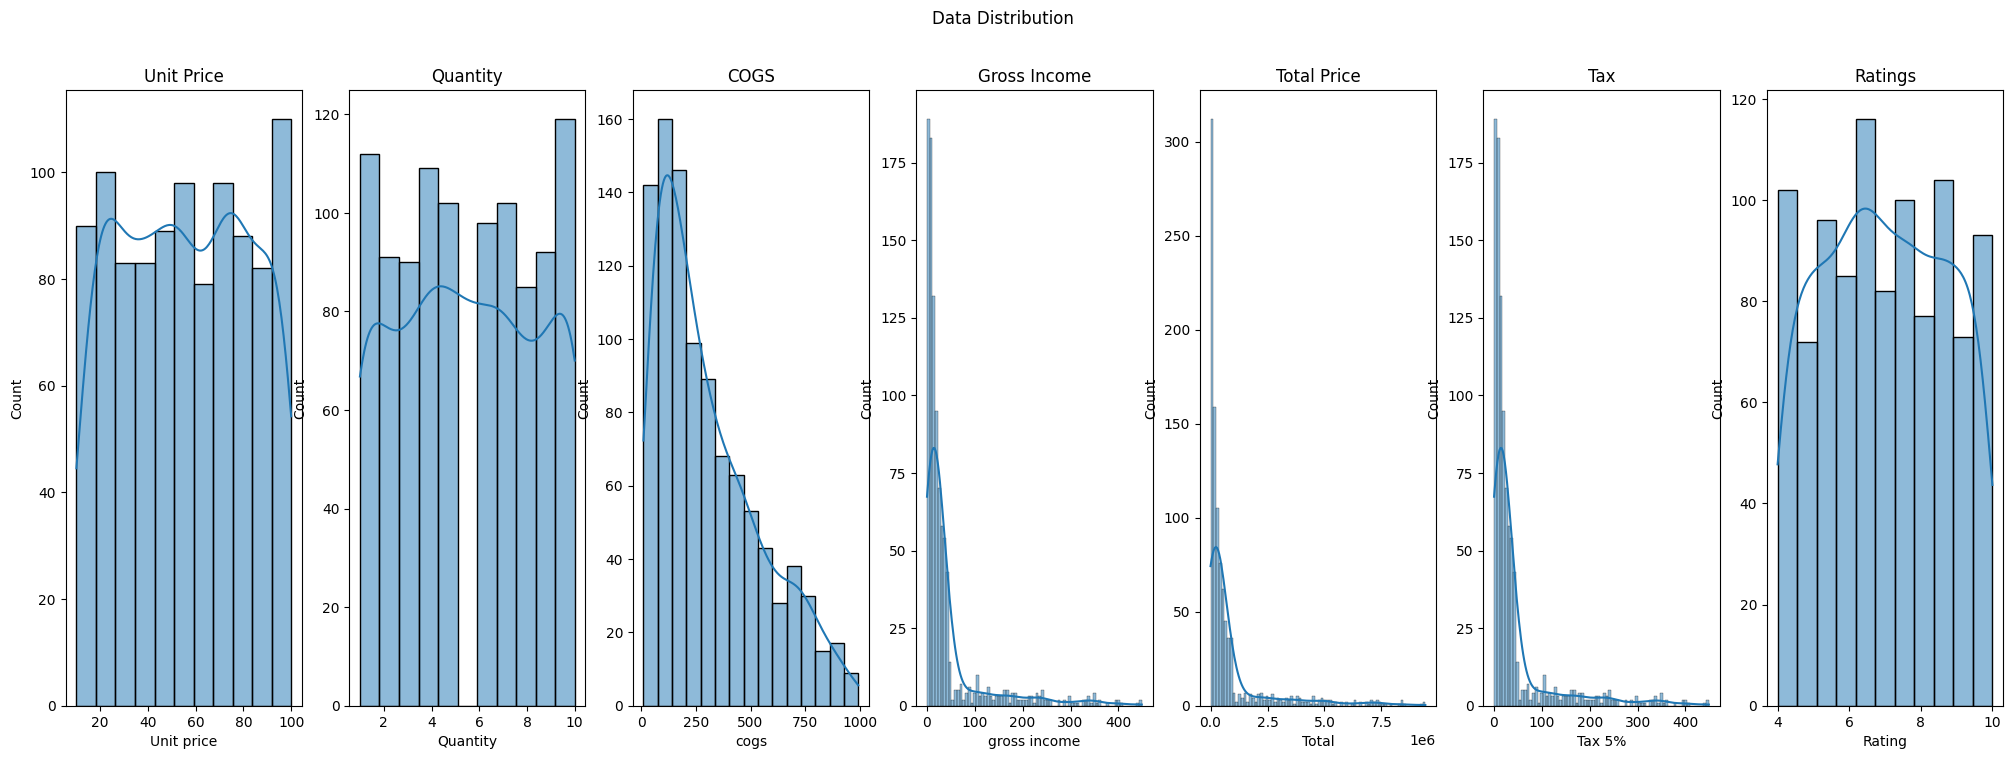

In [147]:
#subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 7, figsize = (25,8))
fig.suptitle('Data Distribution')

# unit_price
sns.histplot(unit_price, kde=True, ax=axes[0])
axes[0].set_title('Unit Price')

# qty
sns.histplot(qty, kde=True, ax=axes[1])
axes[1].set_title('Quantity')

# cogs
sns.histplot(cogs, kde=True, ax=axes[2])
axes[2].set_title('COGS')

# gross_income
sns.histplot(gross_income, kde=True, ax=axes[3])
axes[3].set_title('Gross Income')

# total price
sns.histplot(total_price, kde=True, ax=axes[4])
axes[4].set_title('Total Price')

#tax
sns.histplot(tax, kde=True, ax=axes[5])
axes[5].set_title('Tax')

# ratings
sns.histplot(ratings, kde=True, ax=axes[6])
axes[6].set_title('Ratings')

##### Findings

- Unit Price, Quantity, and Ratings distributed evenly (normal distribution)
- COGS, Gross Income, Total Price, and Tax skewed distribution (positive trailing) and also have outliers in the data

##### Comparisons with Normalized Data (penting gak ya?)

https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

#### Business Questions

- Relationship analysis (especially COGS and Gross Income), does it affect eachother?
- Total sales (overall)
- Total sales per month, branch, city, and gender
- Highest selling product (overall) 
- Peak purchase time (overall and per branch & city) => does purchase time affects our sales?
- Most frequent payment method -> optimization and promotion
- Most frequent item category bought per gender -> target marketing
- Highest tax items => does it affects our sales?
- Relationship between tax with item category -> supposedly the lower the tax, the sales will be much higher rather than high tax product

#### Relationship Analysis

##### Gross Income

Relationship between COGS (Cost of Good Solds) and Gross Income

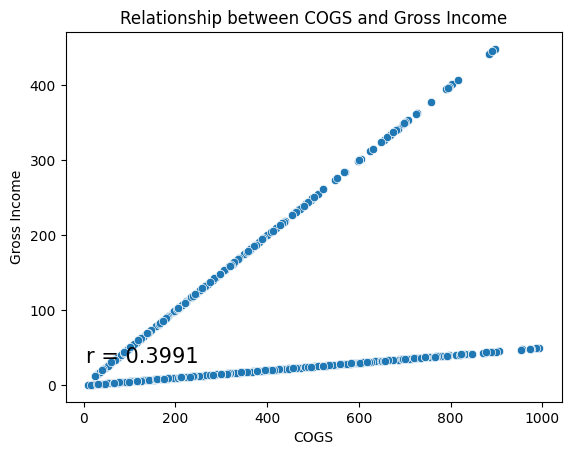

In [148]:
#get columns
cogs_gross_income = df[['cogs', 'gross income']]

#calculate correlation coefficient using pearson correlation
r = scipy.stats.pearsonr(x=df['cogs'], y=df['gross income'])[0]

sns.scatterplot(data=cogs_gross_income, x='cogs', y='gross income')
plt.title('Relationship between COGS and Gross Income')
plt.xlabel('COGS')
plt.ylabel('Gross Income')

#show correlation coefficient to the plot
plt.text(5, 30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.3%20and%200.5%20indicate,if%20any%20(linear)%20correlation.

- Two distinct linear values (COGS and Gross Income)
- Low correlation between them (0.3991), means that COGS doesn't affect gross income, vice versa
- Another factor (e.g unit price, tax, and other numerical values in the data)

Relationship between Gross Income and Unit Price

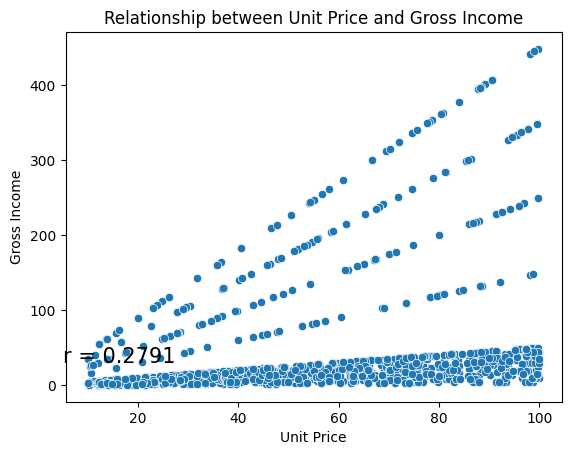

In [149]:
#get columns
unit_price_gross_income = df[['Unit price', 'gross income']]

#calculate correlation coefficient using pearson correlation
r = scipy.stats.pearsonr(x=df['Unit price'], y=df['gross income'])[0]

sns.scatterplot(data=unit_price_gross_income, x='Unit price', y='gross income')
plt.title('Relationship between Unit Price and Gross Income')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')

#show correlation coefficient to the plot
plt.text(5, 30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

Relationship between Quantity and Gross Income

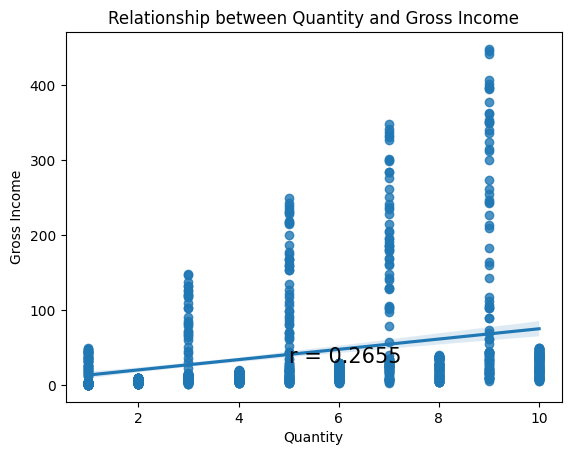

In [150]:
#get columns
qty_gross_income = df[['Quantity', 'gross income']]

#calculate correlation coefficient using pearson correlation
r = scipy.stats.pearsonr(x=df['Quantity'], y=df['gross income'])[0]

sns.regplot(data=qty_gross_income, x='Quantity', y='gross income')
plt.title('Relationship between Quantity and Gross Income')
plt.xlabel('Quantity')
plt.ylabel('Gross Income')

#show correlation coefficient to the plot
plt.text(5, 30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

Relationship between Tax and Gross Income

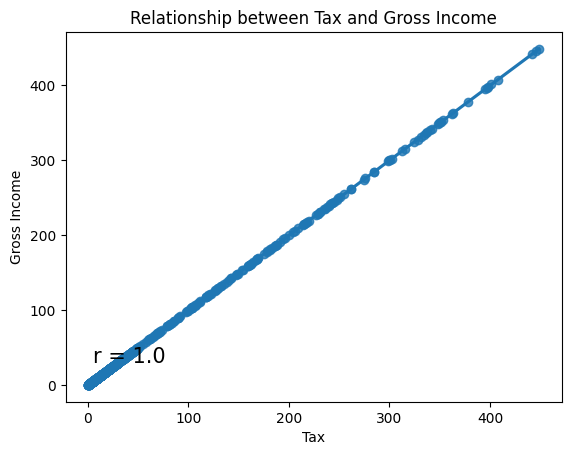

In [151]:
#get columns
tax_gross_income = df[['Tax 5%', 'gross income']]

#calculate correlation coefficient using pearson correlation
r = scipy.stats.pearsonr(x=df['Tax 5%'], y=df['gross income'])[0]

sns.regplot(data=tax_gross_income, x='Tax 5%', y='gross income')
plt.title('Relationship between Tax and Gross Income')
plt.xlabel('Tax')
plt.ylabel('Gross Income')

#show correlation coefficient to the plot
plt.text(5, 30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

**Highly Correlated**

Relationship between Total Price and Gross Income

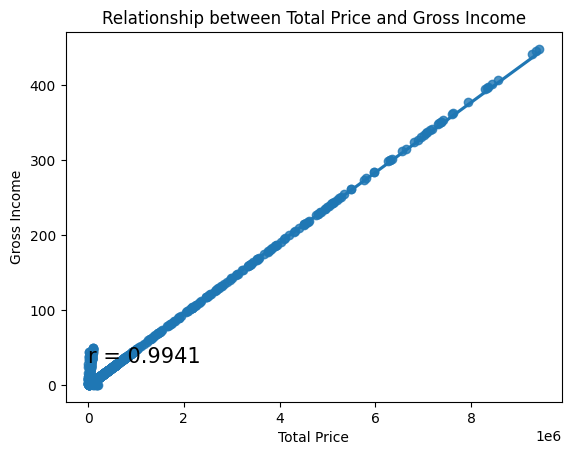

In [152]:
#get columns
price_gross_income = df[['Total', 'gross income']]

#calculate correlation coefficient using pearson correlation
r = scipy.stats.pearsonr(x=df['Total'], y=df['gross income'])[0]

sns.regplot(data=price_gross_income, x='Total', y='gross income')
plt.title('Relationship between Total Price and Gross Income')
plt.xlabel('Total Price')
plt.ylabel('Gross Income')

#show correlation coefficient to the plot
plt.text(5, 30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

**Highly Correlated**

##### Total Price

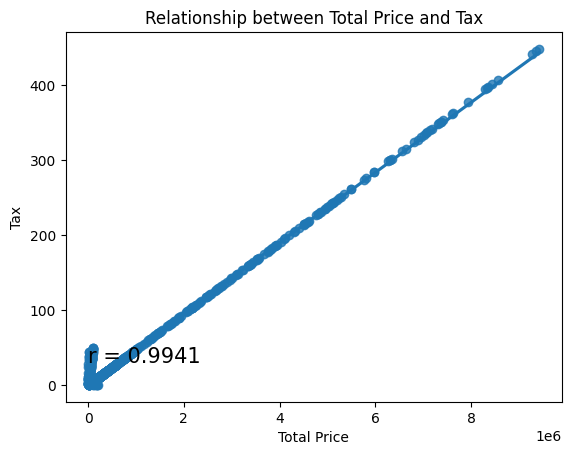

In [153]:
#get columns
price_tax = df[['Total', 'Tax 5%']]

#calculate correlation coefficient using pearson correlation
r = scipy.stats.pearsonr(x=df['Total'], y=df['Tax 5%'])[0]

sns.regplot(data=price_tax, x='Total', y='Tax 5%')
plt.title('Relationship between Total Price and Tax')
plt.xlabel('Total Price')
plt.ylabel('Tax')

#show correlation coefficient to the plot
plt.text(5, 30, 'r = ' + str(round(r, 4)), fontsize=15)

plt.show()

**Highly Correlated**

#### Total Sales Analysis

- Total Transcations

In [220]:
total_sales_qty = df['Invoice ID'].count()
print(total_sales_qty)

1000


- Total Gross Income

In [239]:
total_gross_income = df['gross income'].sum()
print(total_gross_income)

44633.229999999996


#### Sales Breakdown (per Date, Month, Branch, City, and Gender) in Qty

- Date (FIX THIS)

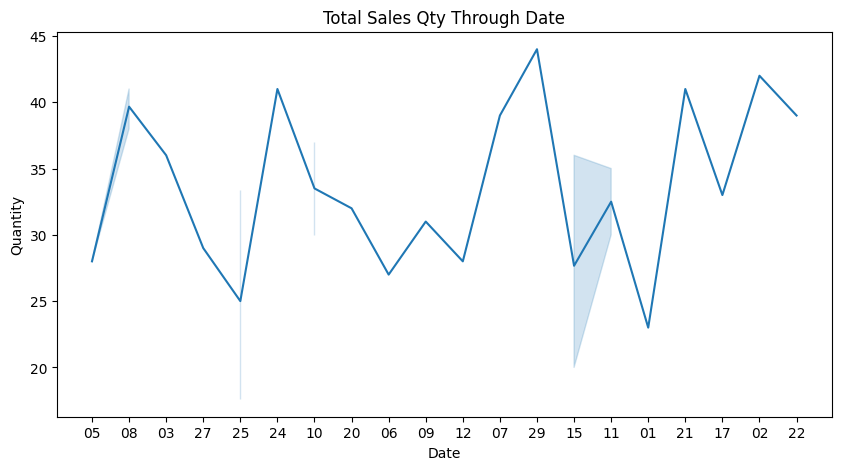

In [224]:
#sort dates
sorted_dates = df['DD'].sort_values(ascending=True)

#sales trends
sales_through_dates = df.groupby('DD').count().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=sales_through_dates, x=sorted_dates, y='Invoice ID', sort=True, ax=ax)
plt.title('Total Sales Qty Through Date')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

- Month (FIX THIS)

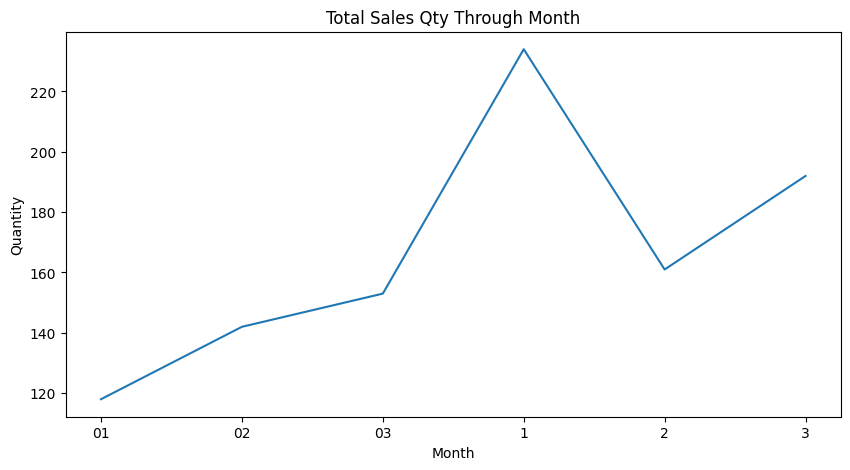

In [225]:
#sales qty trends
#qty_through_dates = df[['Quantity', 'MM']]

#sales trends
sales_through_month = df.groupby('MM').count().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=sales_through_month, x='MM', y='Invoice ID', ax=ax)
plt.title('Total Sales Qty Through Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

- Branch

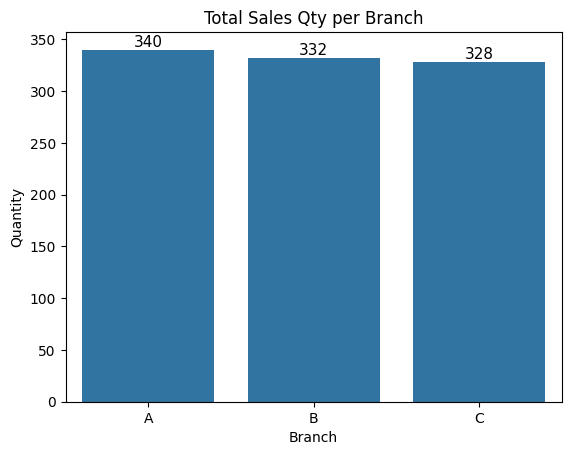

In [227]:
#sales qty per branch
sales_qty_branch = df.groupby('Branch', as_index=False).count()

ax = sns.barplot(data=sales_qty_branch, x='Branch', y='Invoice ID')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Total Sales Qty per Branch')
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.show()

- City

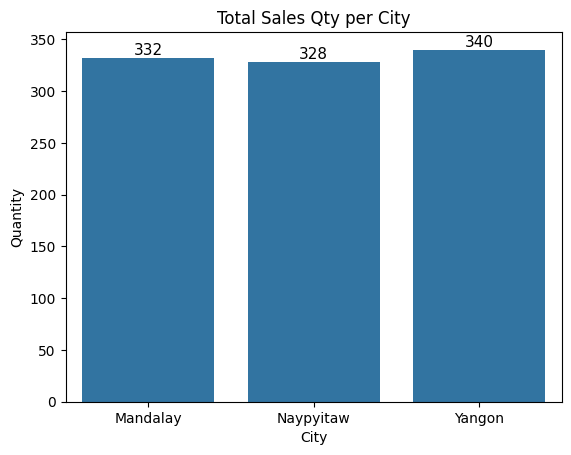

In [228]:
#sales qty per cities
sales_qty_city = df.groupby('City', as_index=False).count()

ax = sns.barplot(data=sales_qty_city, x='City', y='Invoice ID')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Total Sales Qty per City')
plt.xlabel('City')
plt.ylabel('Quantity')
plt.show()

- Gender

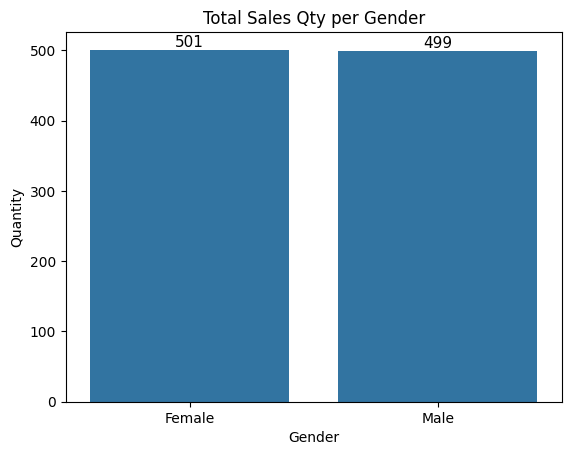

In [229]:
#sales qty per gender
sales_qty_gender = df.groupby('Gender', as_index=False).count()

ax = sns.barplot(data=sales_qty_gender, x='Gender', y='Invoice ID')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Total Sales Qty per Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

#### Product Line and Purchase Trends

- Highest Selling Product Line

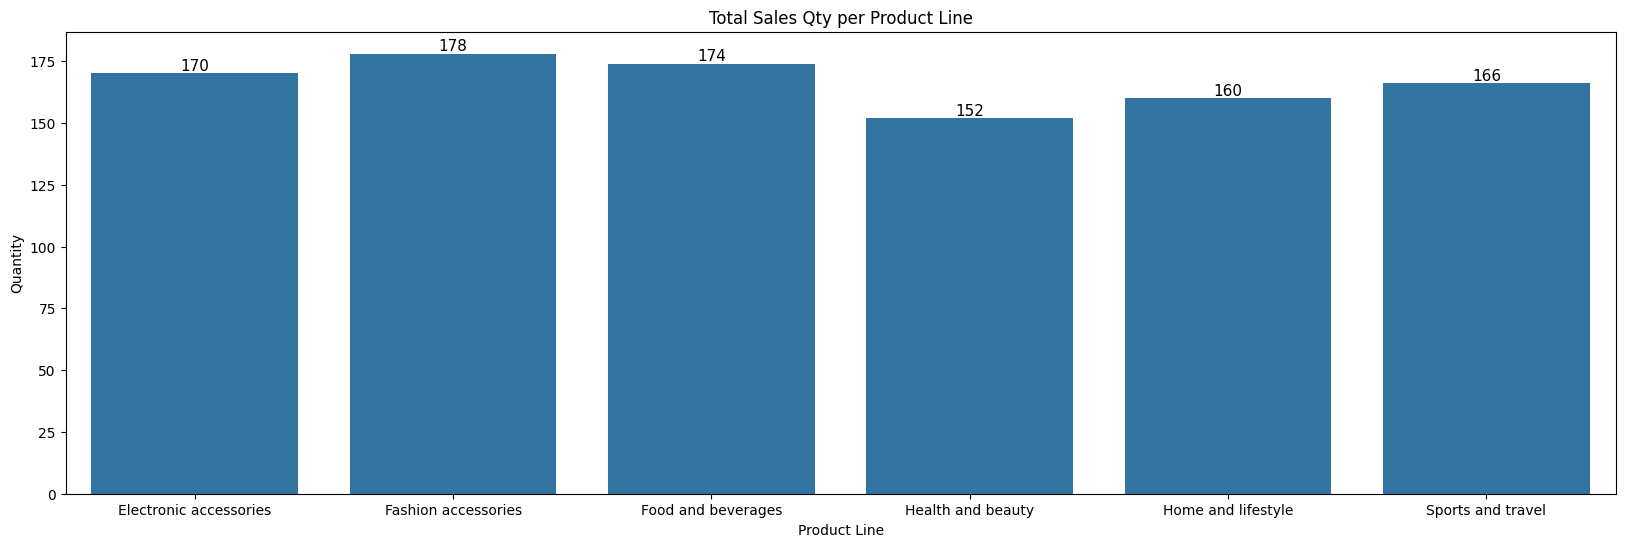

In [230]:
#sales qty per product
sales_qty_product = df.groupby('Product line', as_index=False).count()

plt.figure(figsize=(20, 6))

ax = sns.barplot(data=sales_qty_product, x='Product line', y='Quantity')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Total Sales Qty per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Quantity')
plt.show()

- Peak Purchase Time (FIX THIS)

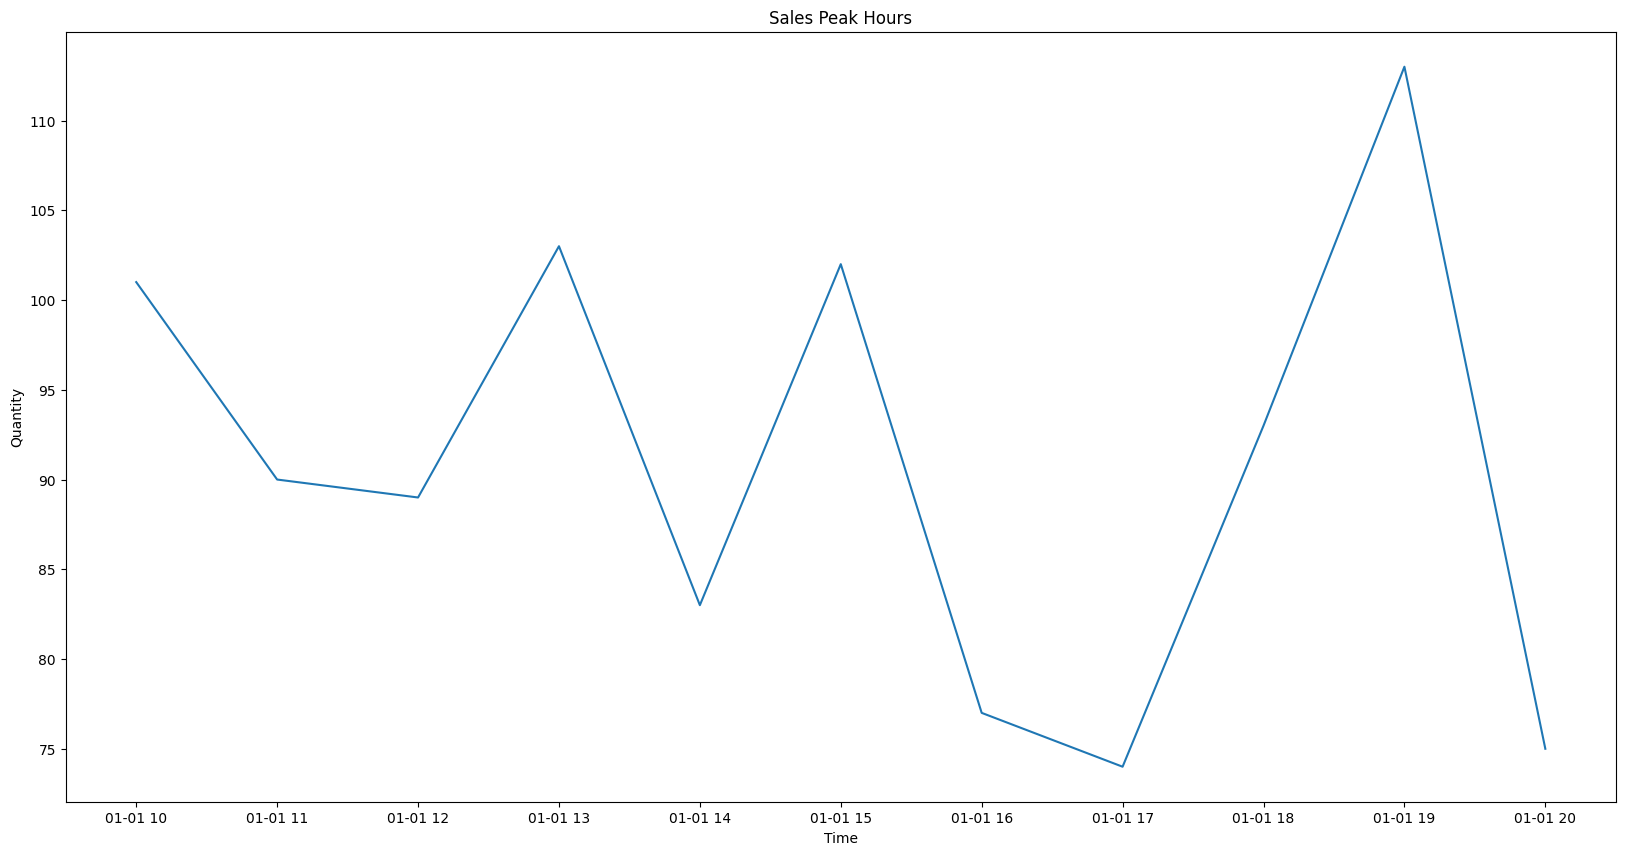

In [259]:
#purchase time
#qty_purchase_time = df[['Quantity', 'Time']]

#df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.floor('H')

qty_purchase_time = df.groupby('Time', as_index=False).count()

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data=qty_purchase_time, x='Time', y='Invoice ID', ax=ax)
plt.title('Sales Peak Hours')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.show()

#### Payment Methods and Item Categories

- Most Frequent Payment Method

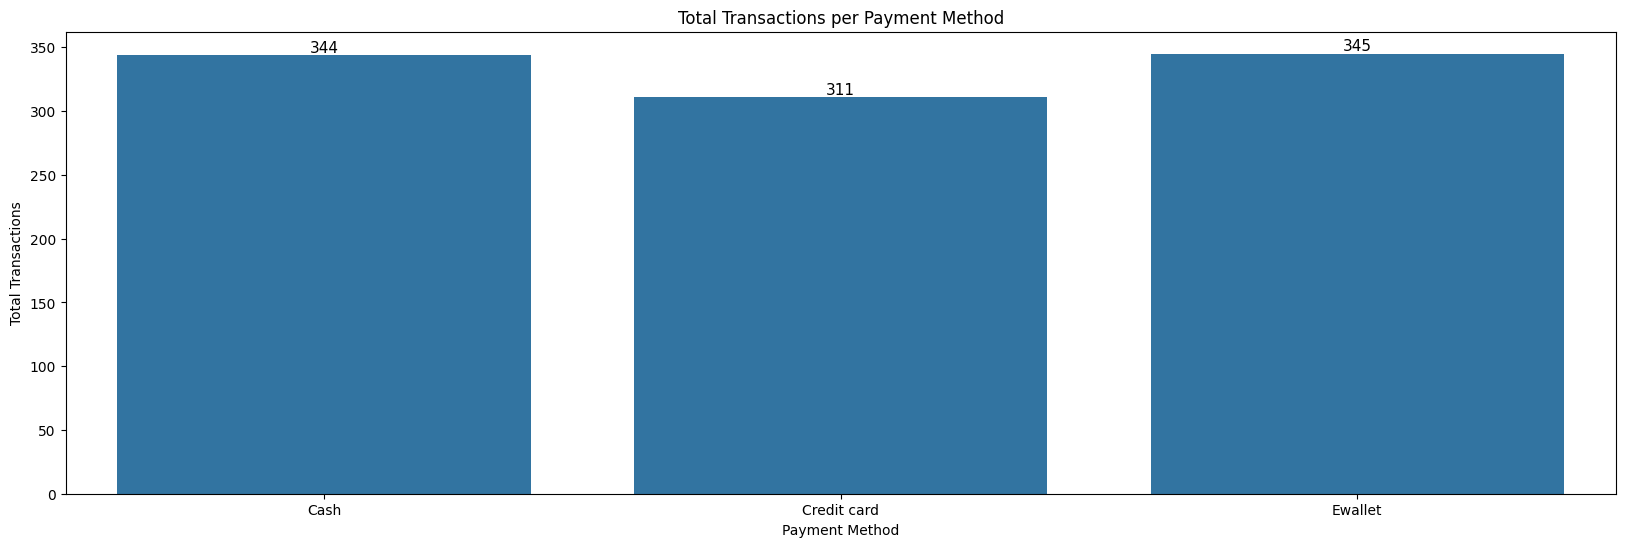

In [236]:
#sales qty per product
count_payment_method = df.groupby('Payment', as_index=False).count()

plt.figure(figsize=(20, 6))

ax = sns.barplot(data=count_payment_method, x='Payment', y='Invoice ID')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Total Transactions per Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Transactions')
plt.show()

- Customer Types

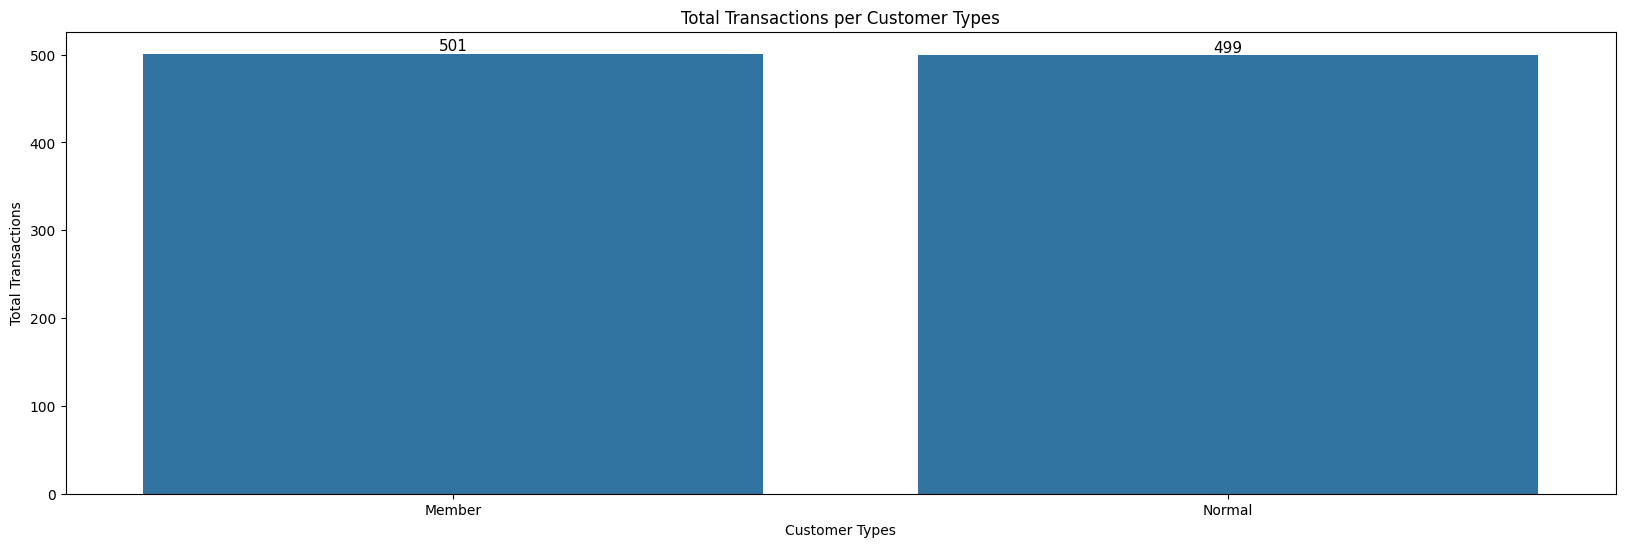

In [237]:
#sales qty per product
count_customer_types = df.groupby('Customer type', as_index=False).count()

plt.figure(figsize=(20, 6))

ax = sns.barplot(data=count_customer_types, x='Customer type', y='Invoice ID')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Total Transactions per Customer Types')
plt.xlabel('Customer Types')
plt.ylabel('Total Transactions')
plt.show()

#### Tax and Sales Analysis

- Highest Tax Items (FIX THIS)

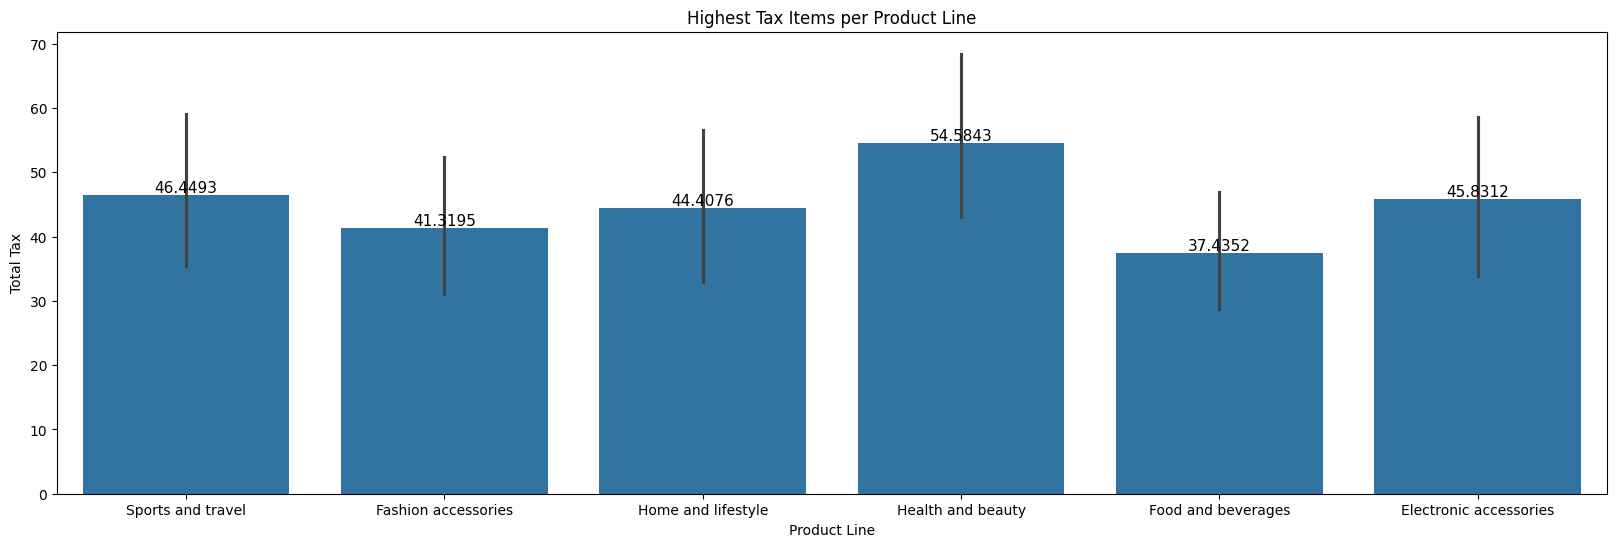

In [250]:
#sales qty per product
highest_tax_items = df.groupby('Tax 5%', as_index=False).max()

plt.figure(figsize=(20, 6))

ax = sns.barplot(data=highest_tax_items, x='Product line', y='Tax 5%')

#show data labels
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Highest Tax Items per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Tax')
plt.show()

- Sales Qty Comparison of Highest Tax Items and Lowest Tax Items

#### Conclusion

- The amount of Gross Income highly correlated to Total Price and Tax 5% (buyer tax), this could be because each item in the dataset had a expensive price tag